# Import  Libary

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, mean_squared_error, root_mean_squared_error

In [175]:
plt.style.use(style='fivethirtyeight')

# Read Data

In [176]:
data = pd.read_csv("Data/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Simple Cleaning Before EDA

In [177]:
data = data.drop(columns=["Ticket", "PassengerId", "Name"])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [178]:
data_out = data.pop("Survived")
data["Survived"] = data_out

In [179]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,female,19.0,0,0,30.0000,B42,S,1
888,3,female,NaN,1,2,23.4500,NaN,S,0
889,1,male,26.0,0,0,30.0000,C148,C,1


# EDA

In [180]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0


In [181]:
data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [182]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [183]:
data.info

<bound method DataFrame.info of      Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  Survived
0         3    male  22.0      1      0   7.2500   NaN        S         0
1         1  female  38.0      1      0  71.2833   C85        C         1
2         3  female  26.0      0      0   7.9250   NaN        S         1
3         1  female  35.0      1      0  53.1000  C123        S         1
4         3    male  35.0      0      0   8.0500   NaN        S         0
..      ...     ...   ...    ...    ...      ...   ...      ...       ...
886       2    male  27.0      0      0  13.0000   NaN        S         0
887       1  female  19.0      0      0  30.0000   B42        S         1
888       3  female   NaN      1      2  23.4500   NaN        S         0
889       1    male  26.0      0      0  30.0000  C148        C         1
890       3    male  32.0      0      0   7.7500   NaN        Q         0

[891 rows x 9 columns]>

In [184]:
data.shape

(891, 9)

In [185]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Survived'],
      dtype='object')

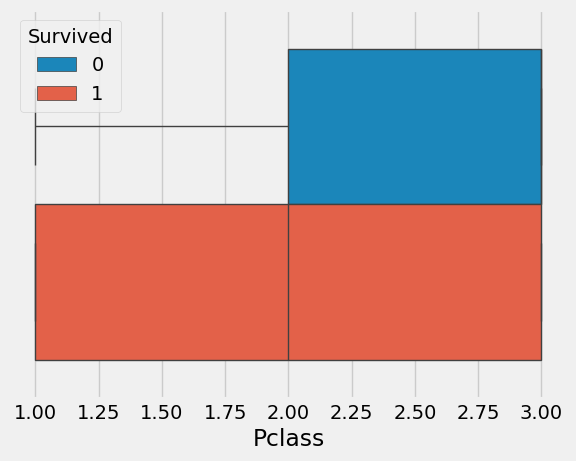

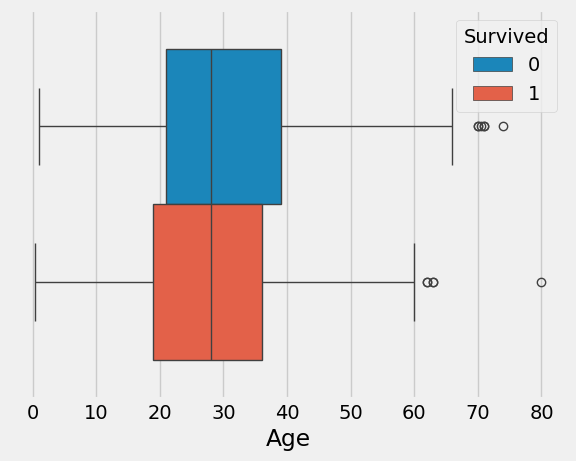

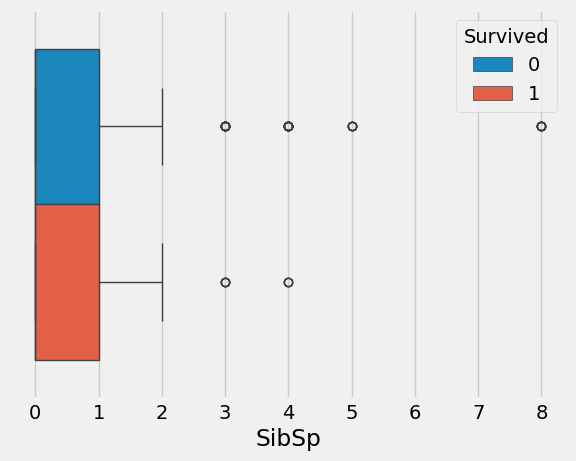

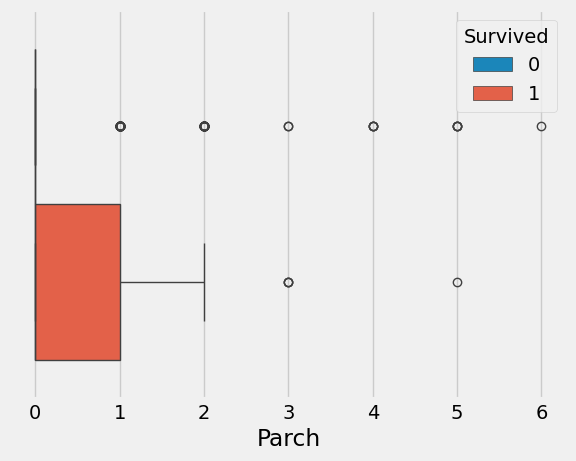

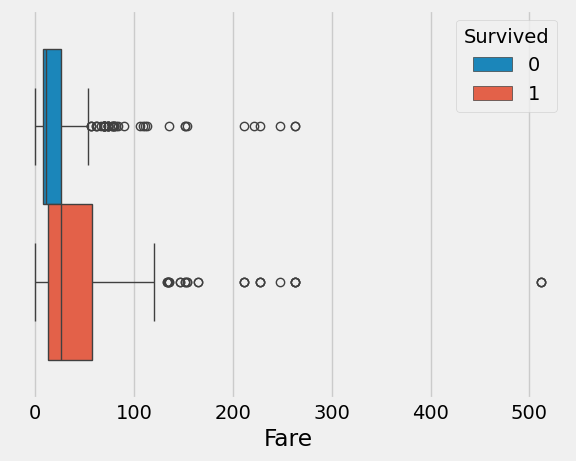

In [186]:
for column in data.columns[:-1]:
    if data[column].dtype != "object":
        sns.boxplot(data=data, x=column, hue="Survived")
        plt.show()

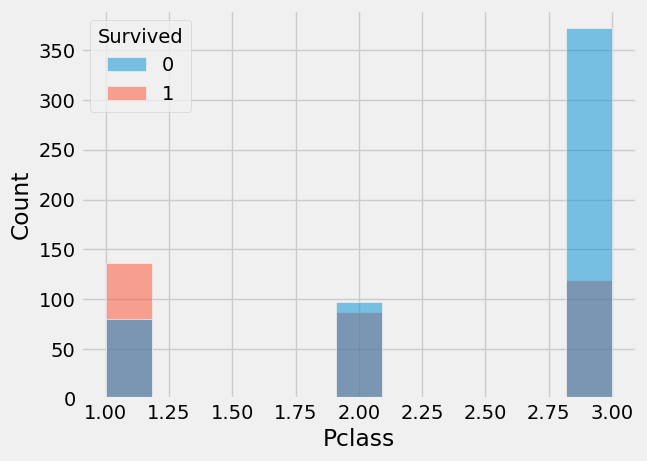

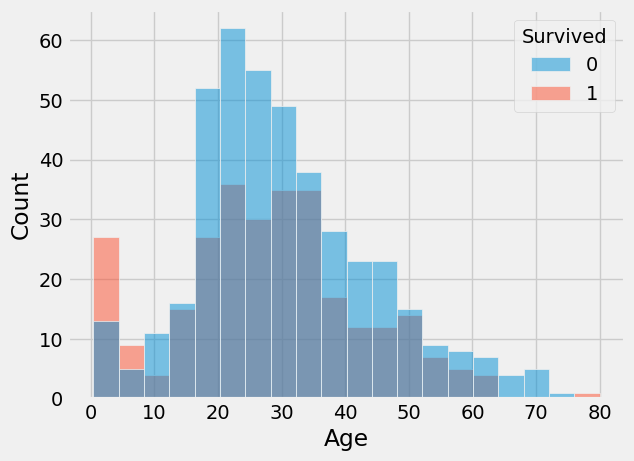

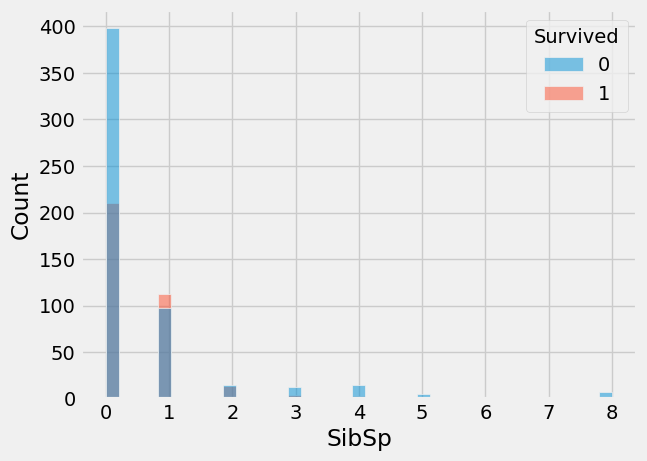

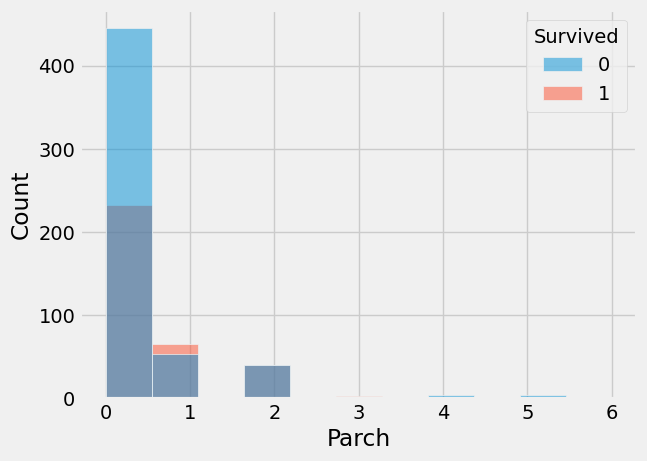

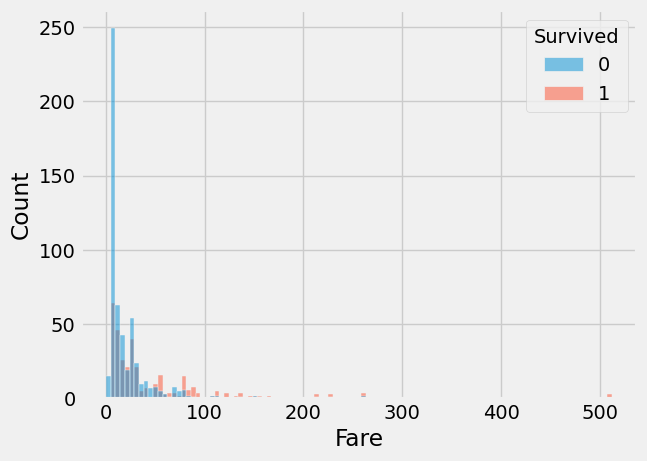

In [187]:
for column in data.columns[:-1]:
    if data[column].dtype != "object":
        sns.histplot(data=data, x=column, hue="Survived")
        plt.show()

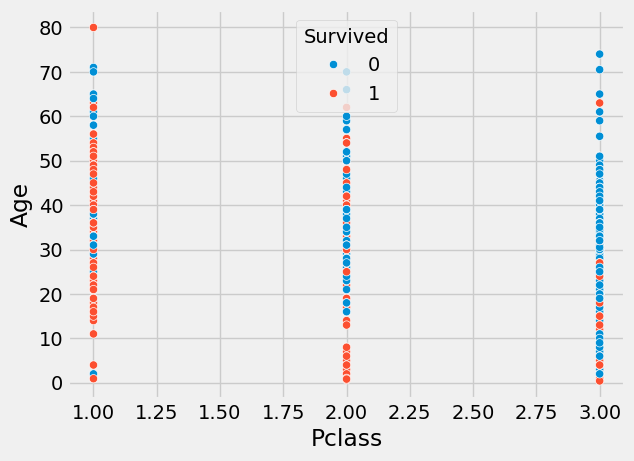

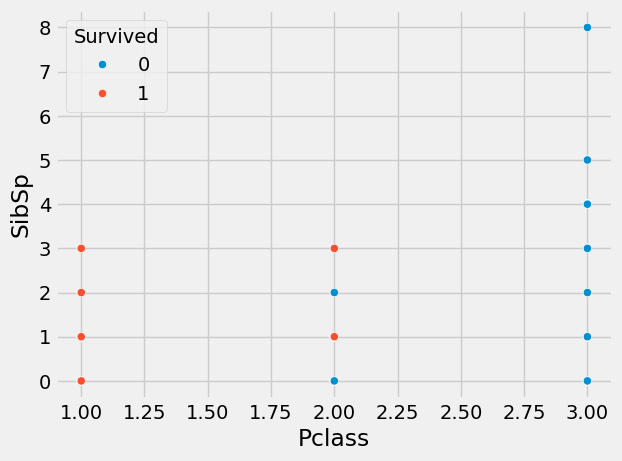

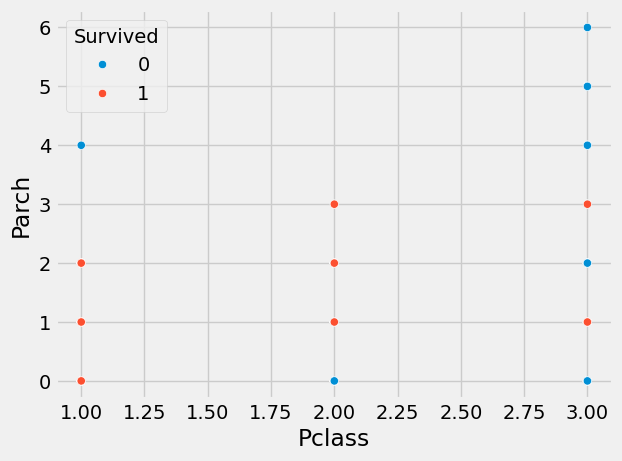

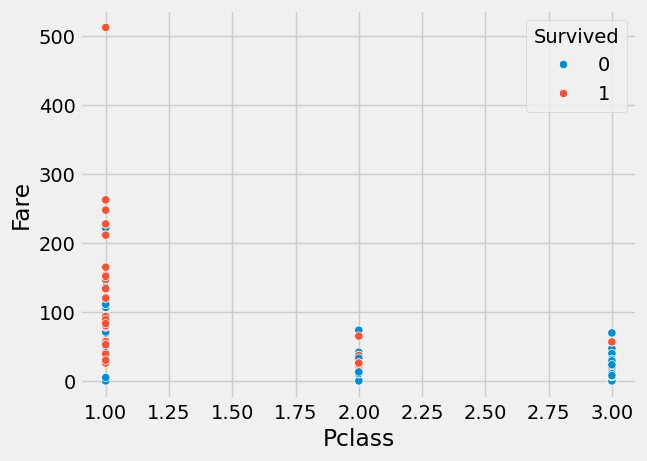

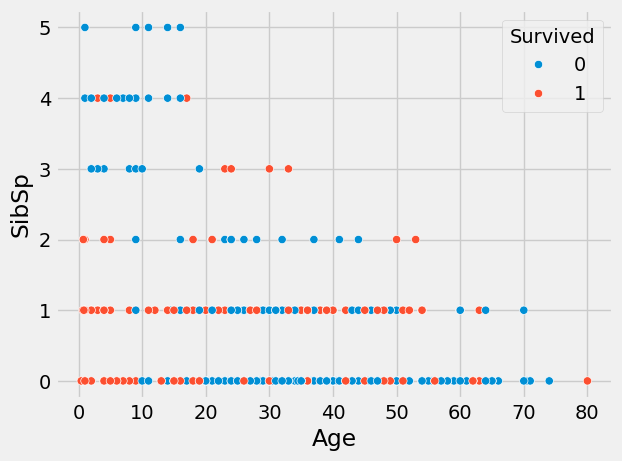

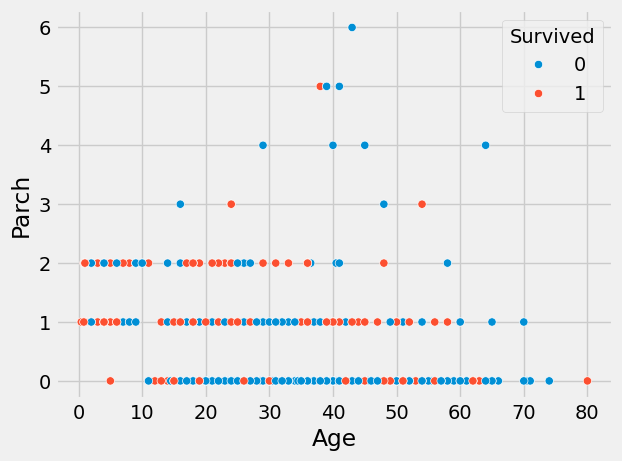

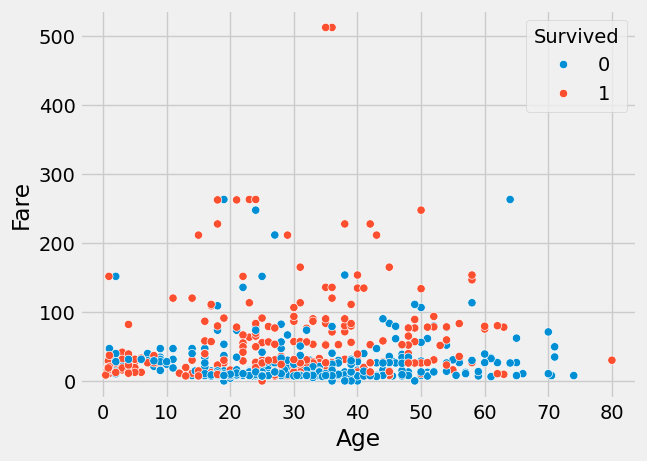

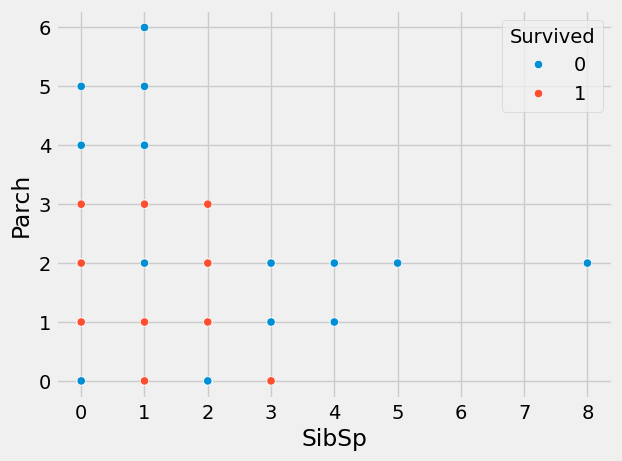

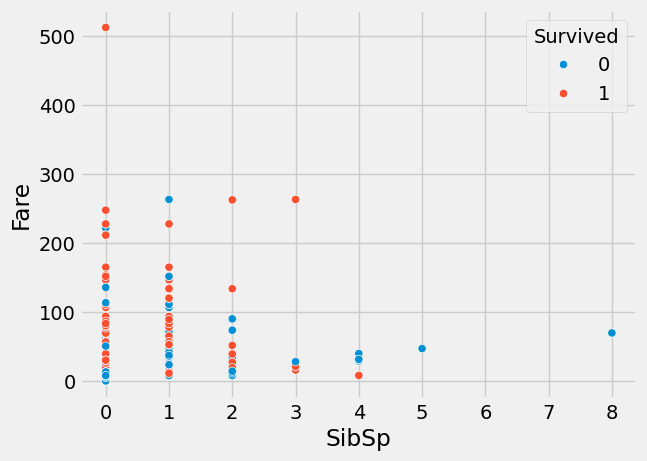

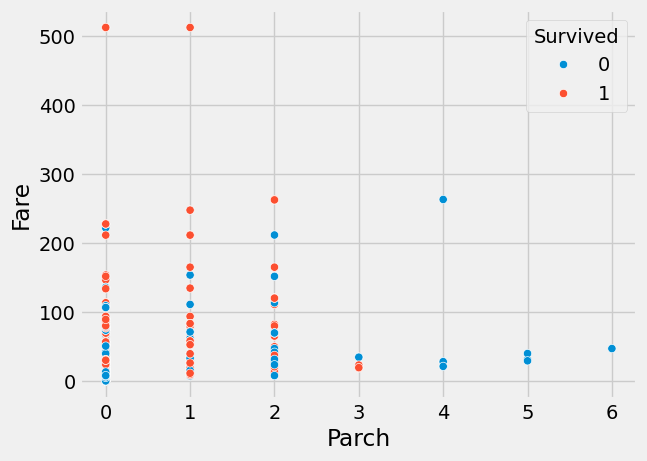

In [188]:
# for column in data.columns[:-1]:
#     if (data[column].dtype != "object"):
#         sns.scatterplot(data=data, x=column, y="Survived")
#         plt.show()

for i in range(len(data.columns) - 1) :
  for j in range(i + 1, len(data.columns) - 1) :
    if(data[data.columns[i]].dtype != "object" and data[data.columns[j]].dtype != "object") :
      sns.scatterplot(data = data, x = data.columns[i], y = data.columns[j], hue = "Survived")
      plt.show()

In [189]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        print (f"Column: {column}, Skewness: {data[column].skew()}, Kurtosis: {data[column].kurt()}")

Column: Pclass, Skewness: -0.6305479068752845, Kurtosis: -1.2800149715782825
Column: Age, Skewness: 0.38910778230082704, Kurtosis: 0.17827415364210353
Column: SibSp, Skewness: 3.6953517271630565, Kurtosis: 17.880419726645968
Column: Parch, Skewness: 2.7491170471010933, Kurtosis: 9.778125179021648
Column: Fare, Skewness: 4.787316519674893, Kurtosis: 33.39814088089868


Skewness -> 0 = Bagus
<br>
Kurtosis -> 3 = Bagus

# Data Preprocessing

In [190]:
data.isna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,True,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False


In [191]:
data.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [192]:
missing_value_percentage = data.isna().sum() / len(data)
missing_value_percentage

Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
Survived    0.000000
dtype: float64

In [193]:
for key, value in missing_value_percentage.items():
    if (value > 0.5):
        data = data.drop(columns=key)

In [194]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [195]:
data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [196]:
for column in data.columns:
    if (data[column].dtype == "object"):
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].median())

In [197]:
data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [198]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,28.0,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [199]:
data = data.drop(columns="Age")

In [200]:
encoder = LabelEncoder()
encoded = {}

for column in data.columns:
    if (data[column].dtypes == "object"):
        data[column] = encoder.fit_transform(data[column])
        encoded[column] = {i:class_name for i, class_name in enumerate(encoder.classes_)}

In [222]:
for key, value in encoded.items():
    print (f"Key: {key}, Value {value}")

Key: Sex, Value {0: 'female', 1: 'male'}
Key: Embarked, Value {0: 'C', 1: 'Q', 2: 'S'}


In [201]:
data.dtypes

Pclass        int64
Sex           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
Survived      int64
dtype: object

In [202]:
encoded

{'Sex': {0: 'female', 1: 'male'}, 'Embarked': {0: 'C', 1: 'Q', 2: 'S'}}

In [203]:
data.dtypes

Pclass        int64
Sex           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
Survived      int64
dtype: object

In [204]:
data

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,1,1,0,7.2500,2,0
1,1,0,1,0,71.2833,0,1
2,3,0,0,0,7.9250,2,1
3,1,0,1,0,53.1000,2,1
4,3,1,0,0,8.0500,2,0
...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,2,0
887,1,0,0,0,30.0000,2,1
888,3,0,1,2,23.4500,2,0
889,1,1,0,0,30.0000,0,1


In [225]:
data.median()

Pclass       3.0000
Sex          1.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
Embarked     2.0000
Survived     0.0000
dtype: float64

In [206]:
data.mean()

Pclass       2.308642
Sex          0.647587
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Embarked     1.536476
Survived     0.383838
dtype: float64

In [207]:
data.mode()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,1,0,0,8.05,2,0


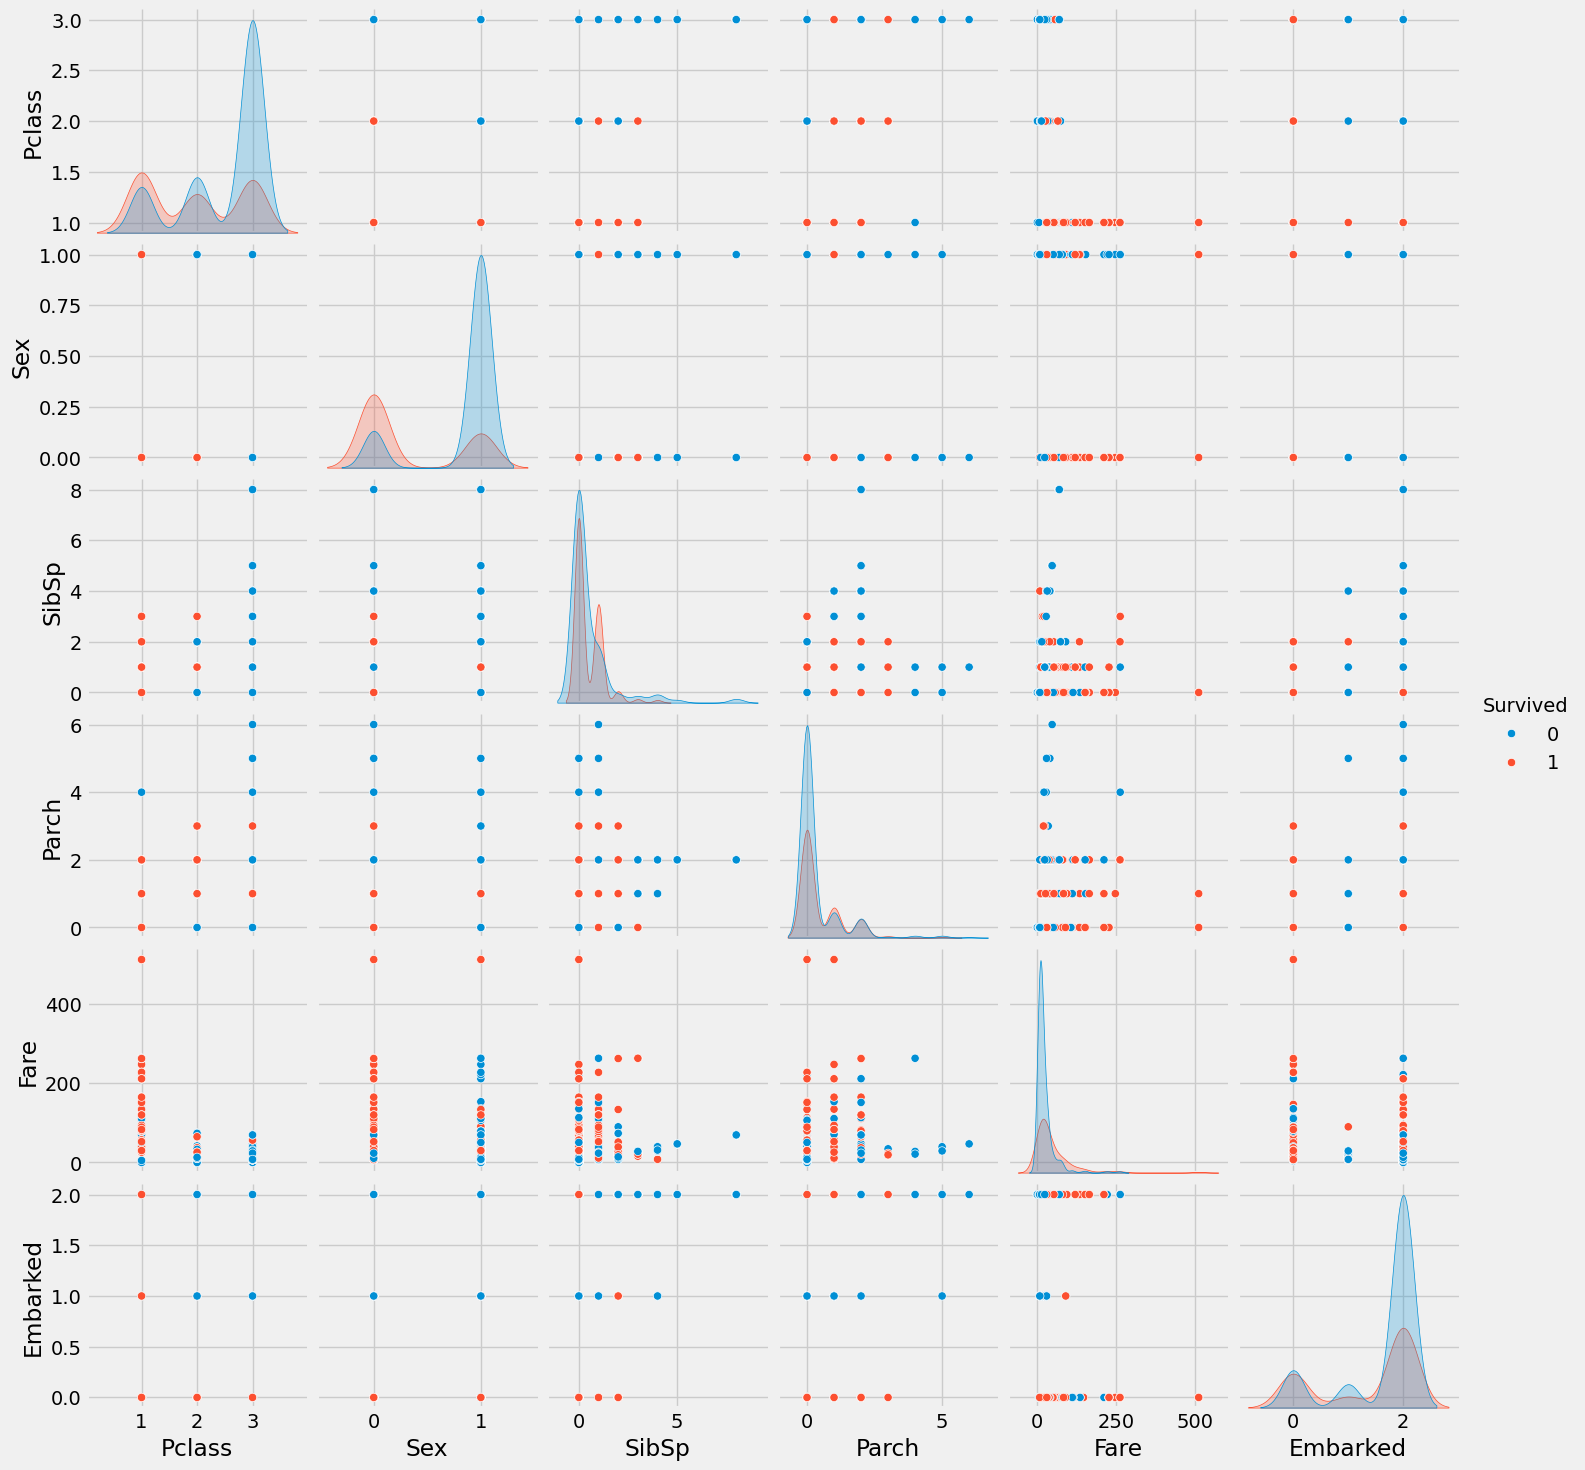

In [208]:
sns.pairplot(data, hue = "Survived")

<Axes: >

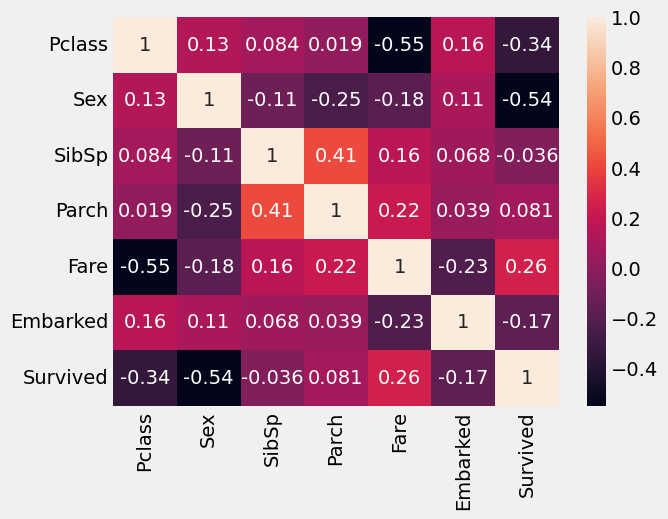

In [209]:
sns.heatmap(data=data[:-1].corr(), annot=True)

# Modelling

In [210]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [211]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [213]:
y_train = np.reshape(y_train, (-1, 1)) #Kita ubah menjadi 2 Dimensi
y_test = np.reshape(y_test, (-1, 1)) #same here

#Scaling-nya bisa pakai MinMaxScaler atau StandardScaler, sesuaikan preferensi kalian.
scaler_x_minmax = MinMaxScaler()
scaler_y_minmax = MinMaxScaler()

def scaling(x1, x2, y1, y2, scaler_x, scaler_y) : 
	x1 = scaler_x.fit_transform(x1)
	x2 = scaler_x.transform(x2)
	y1 = scaler_y.fit_transform(y1)
	y2 = scaler_y.transform(y2)
	return x1, x2, y1, y2, scaler_x, scaler_y

x_train, x_test, y_train, y_test, scaler_x_minmax, scaler_y_minmax = scaling(x_train, x_test, y_train, y_test, scaler_x_minmax, scaler_y_minmax)

In [214]:
model = LinearRegression()
model.fit(X=x, y=y)

LinearRegression()

In [215]:
y_pred = model.predict(x_test)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [216]:
model2 = LogisticRegression()
model2.fit(X=x, y=y)

LogisticRegression()

In [217]:
model3 = GaussianNB()
model3.fit(X=x, y=y)

GaussianNB()

In [218]:
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Evaluation

### Linear Regression

In [219]:
mse = mean_squared_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2: {r2}")

MSE: 0.2316974168261528
RMSE: 0.4813495786080557
R2: -2.440030208213736


### Logistic Regression

In [220]:
mse = mean_squared_error(y_pred2, y_test)
rmse = root_mean_squared_error(y_pred2, y_test)
r2 = r2_score(y_pred2, y_test)

a = recall_score(y_pred3, y_test)
b = precision_score(y_pred3, y_test)
c = accuracy_score(y_pred2, y_test)
d = roc_auc_score(y_pred2, y_test)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2: {r2}")

print (f"Recall: {a}")
print (f"Precission: {b}")
print (f"Accuracy: {c}")
print (f"ROC AUC Score: {d}")

MSE: 0.3575418994413408
RMSE: 0.5979480742015487
R2: -0.5915532092247848
Recall: 0.5
Precission: 0.9285714285714286
Accuracy: 0.6424581005586593
ROC AUC Score: 0.6971380939149763


In [221]:
mse = mean_squared_error(y_pred3, y_test)
rmse = root_mean_squared_error(y_pred3, y_test)
r2 = r2_score(y_pred3, y_test)

a = recall_score(y_pred3, y_test)
b = precision_score(y_pred3, y_test)
c = accuracy_score(y_pred3, y_test)
d = roc_auc_score(y_pred3, y_test)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2: {r2}")

print (f"Recall: {a}")
print (f"Precission: {b}")
print (f"Accuracy: {c}")
print (f"ROC AUC Score: {d}")

MSE: 0.39106145251396646
RMSE: 0.6253490645343338
R2: -0.9670329670329674
Recall: 0.5
Precission: 0.9285714285714286
Accuracy: 0.6089385474860335
ROC AUC Score: 0.6989795918367346


# Conclusion

- Kalau accuracy_score LogisticRegression() > accuracy_score GaussianNB(), maka :
    - Data tidak ter-distribusi normal.
    - Fitur saling berkorelasi.
    - Pemisahan kelas/kategori bersifat linear.
- Kalau accuracy_score GaussianNB() > dari accuracy_score LogisticRegression(), maka :
    - Data terdistribusi normal.
    - Fitur bersifat independent (bebas).
    - Dataset kecil atau memiliki noise tinggi.